In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df =pd.read_csv("C:/Users/SOWNDARYA/Downloads/MarketSegmentation-main/MarketSegmentation-main/Customer Data.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# Exploratory Data Analysis

In [3]:
df.shape

(8950, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
# filling mean value in place of missing value in the dataset
df['MINIMUM_PAYMENTS'] =df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT'] =df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [8]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
# checking for duplicated rows in the dataset
df.duplicated().sum()

0

In [10]:
# drop CUST_ID column because it is not used
df.drop(['CUST_ID'],axis=1,inplace=True)

In [11]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

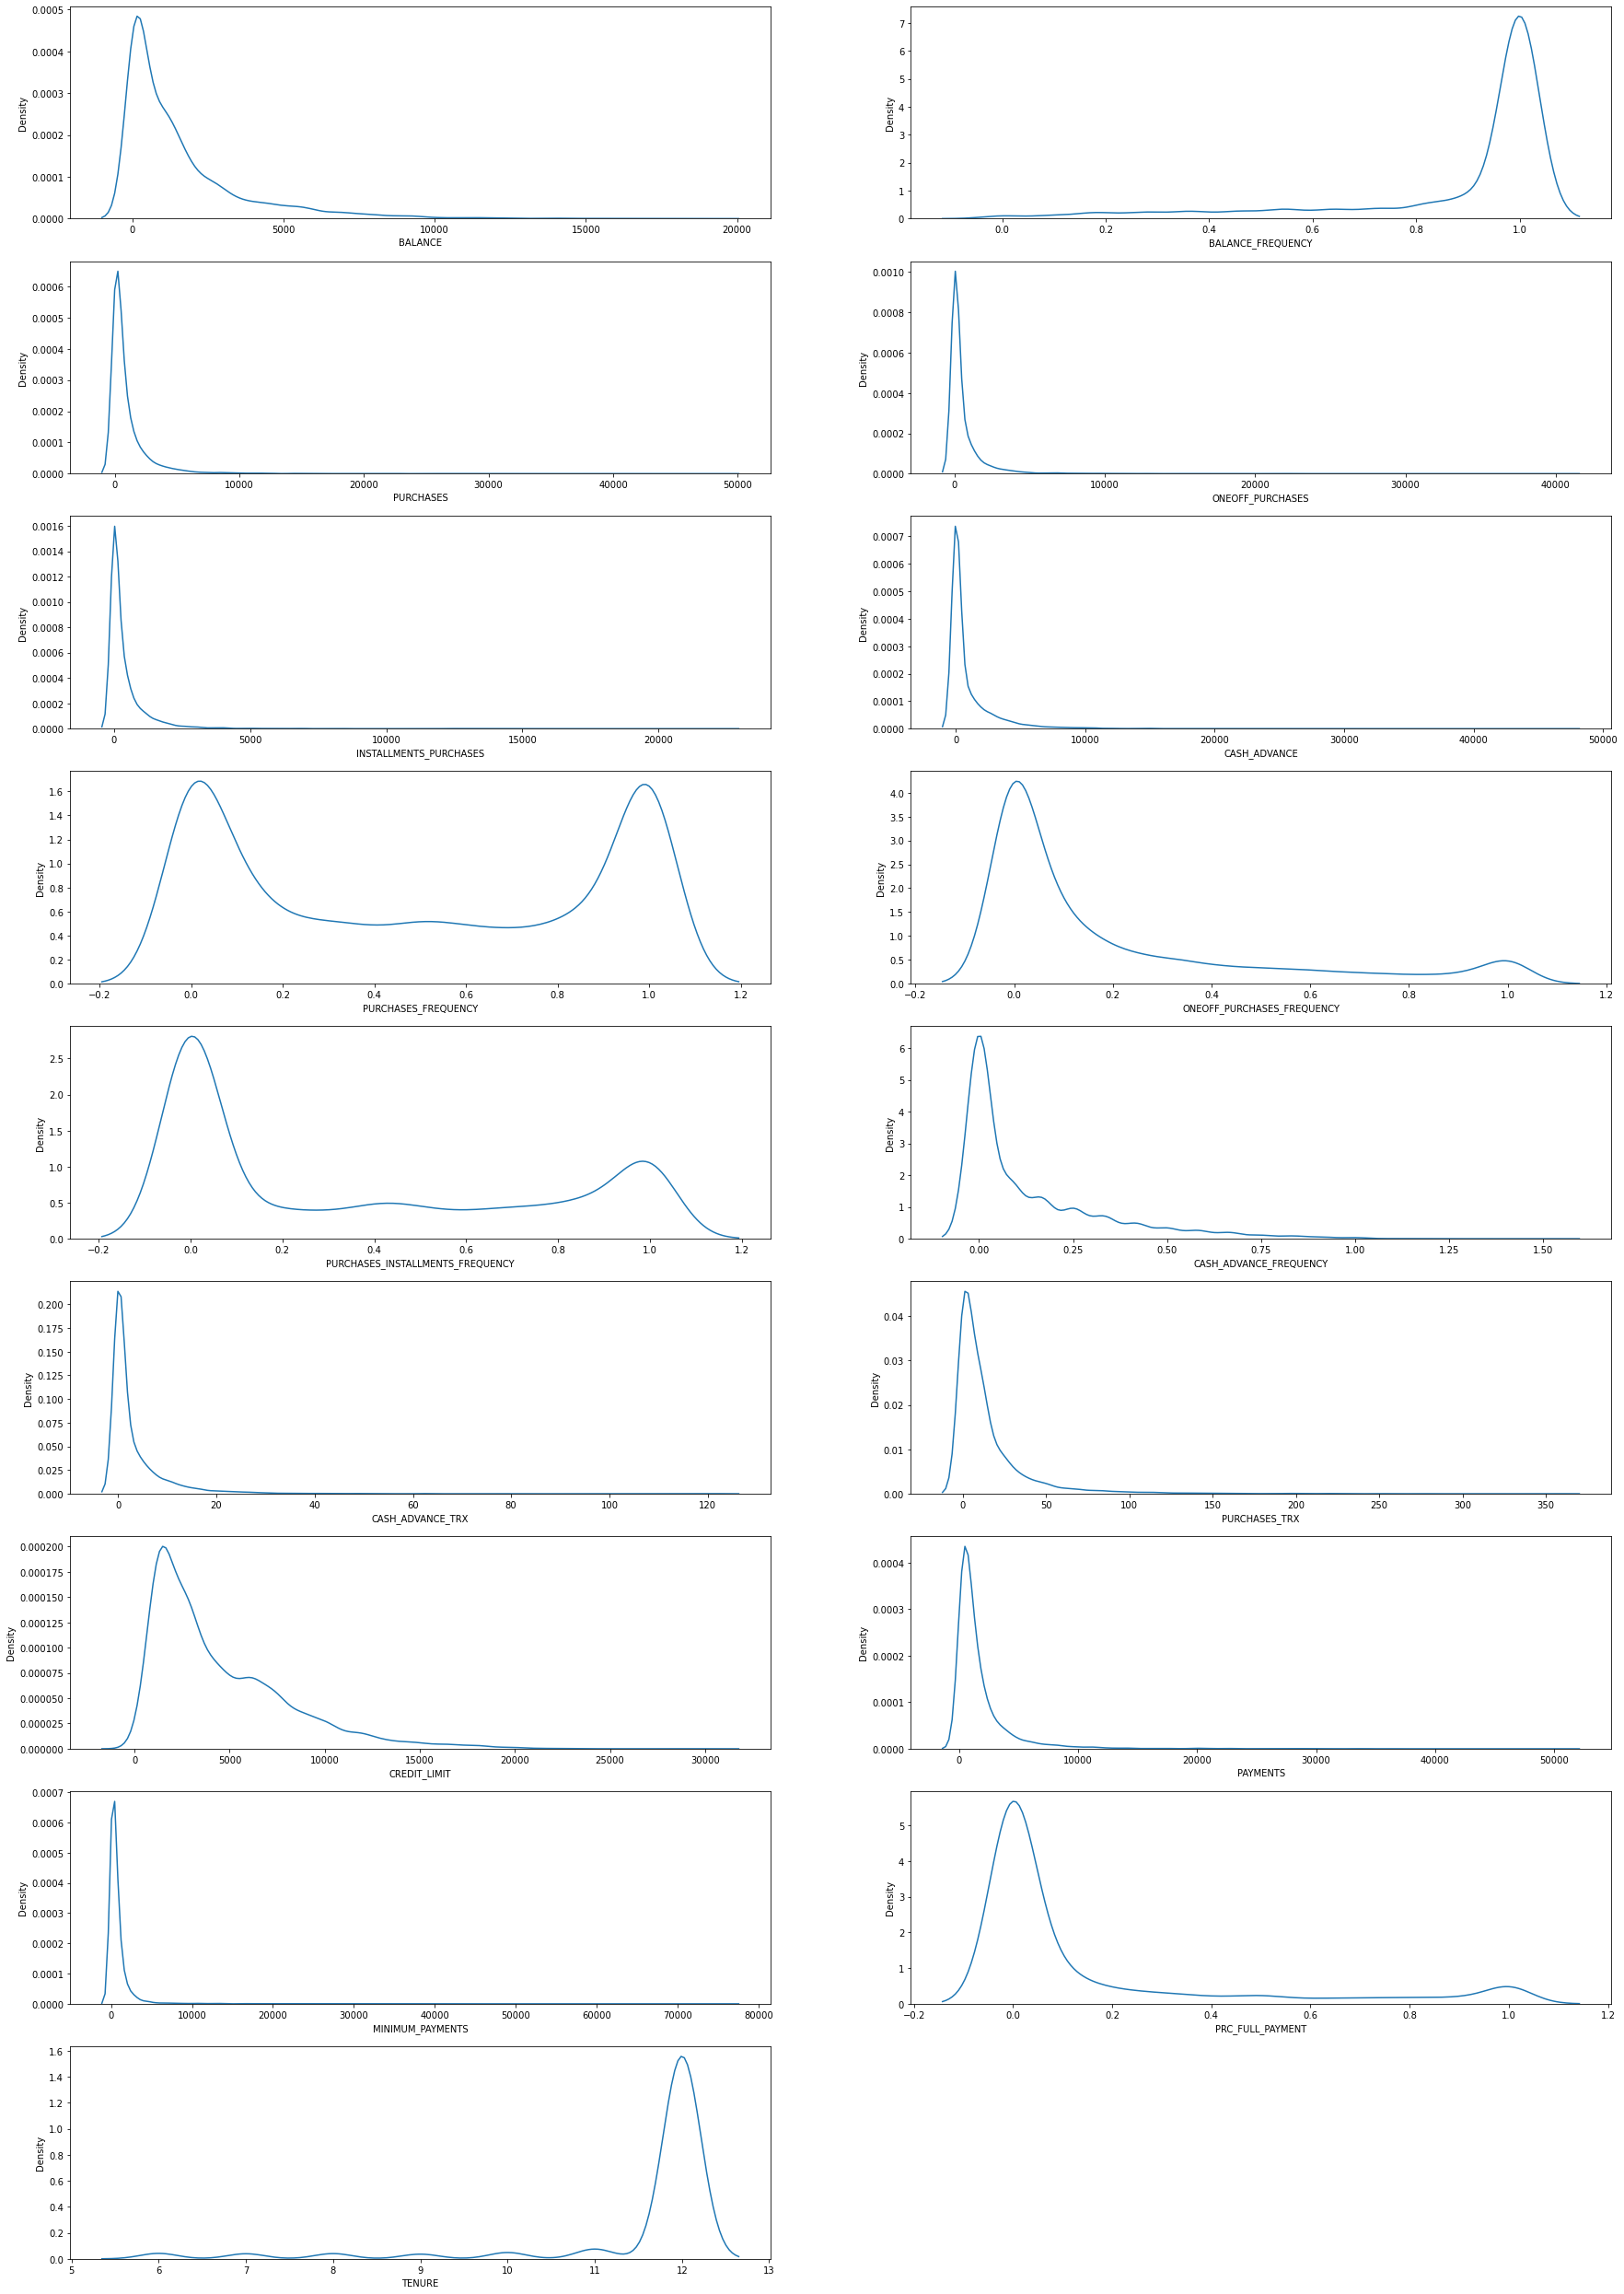

In [12]:
 plt.figure(figsize=(30,45))
 for i,col in enumerate(df.columns):
    if df[col].dtype!='object':
        ax = plt.subplot(9,2,i+1)
        sns.kdeplot(df[col],ax=ax)
        plt.xlabel(col) 

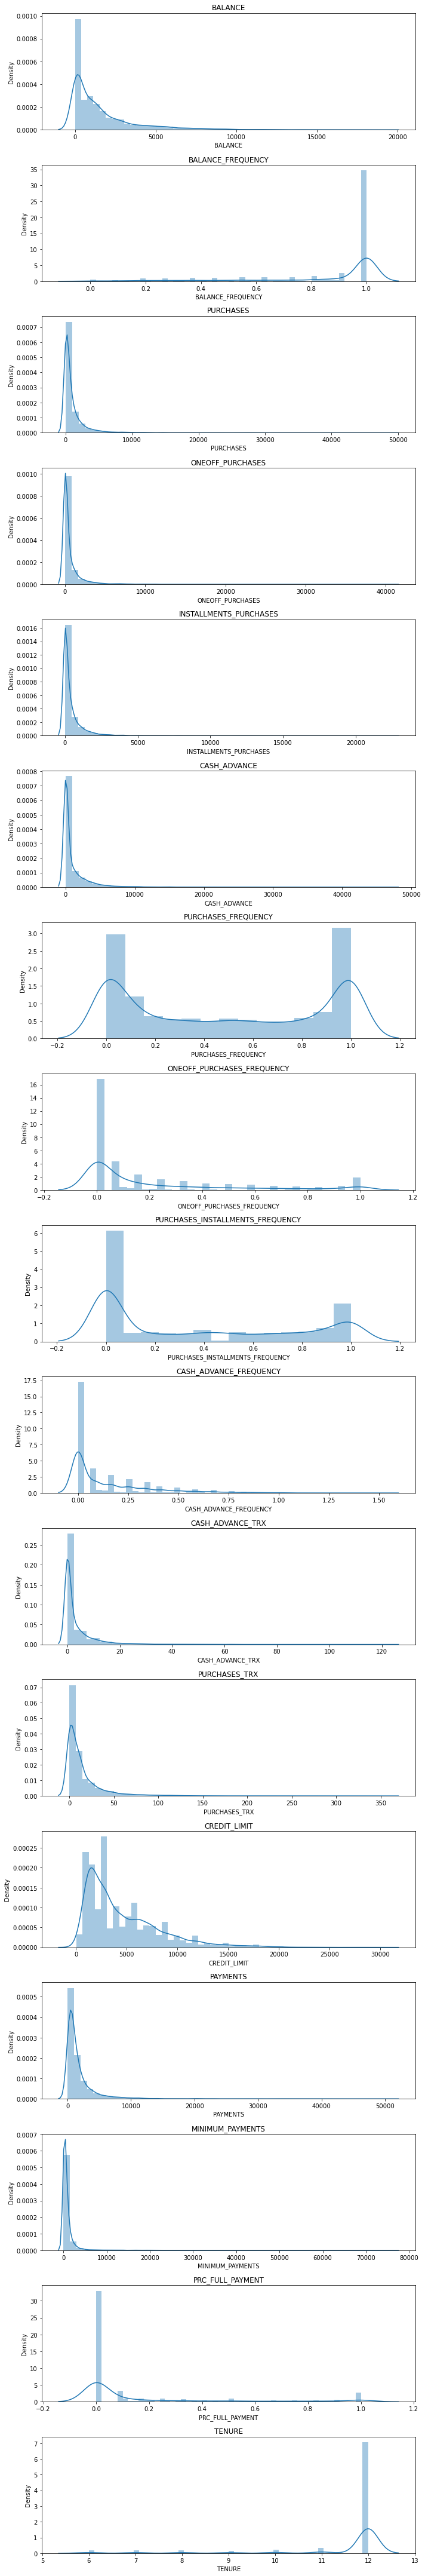

In [13]:
plt.figure(figsize=(10,60))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]])
    plt.title(df.columns[i])
plt.tight_layout()   

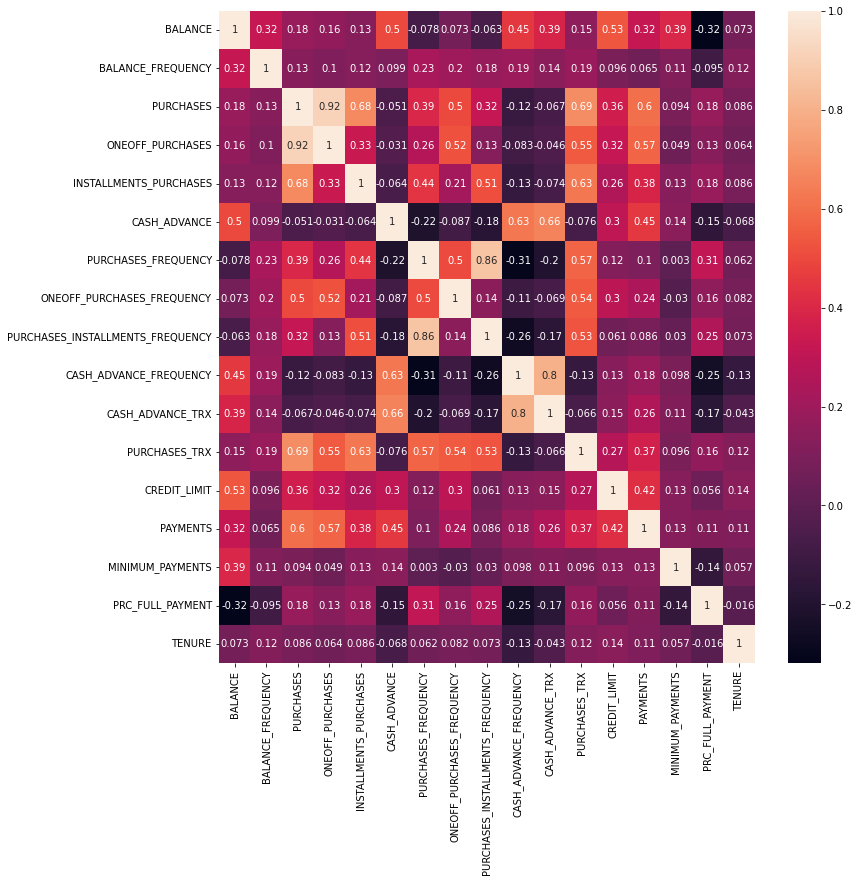

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Scaling the DataFrame

In [15]:
scalar =StandardScaler()
scaled_df = scalar.fit_transform(df)

In [16]:
pca =PCA()
pca.fit(scaled_df)

PCA()

In [23]:
pca.explained_variance_ratio_

array([2.72900372e-01, 2.03019913e-01, 8.79197945e-02, 7.47997502e-02,
       6.26279204e-02, 5.75021129e-02, 4.88723464e-02, 4.25748554e-02,
       3.82880445e-02, 3.08000623e-02, 2.37189739e-02, 1.77363237e-02,
       1.42649185e-02, 1.21736915e-02, 1.01298988e-02, 2.67033632e-03,
       6.85223491e-07])

In [24]:
pca.explained_variance_ratio_.cumsum()

array([0.27290037, 0.47592029, 0.56384008, 0.63863983, 0.70126775,
       0.75876986, 0.80764221, 0.85021707, 0.88850511, 0.91930517,
       0.94302415, 0.96076047, 0.97502539, 0.98719908, 0.99732898,
       0.99999931, 1.        ])

Text(0, 0.5, 'Cumulative Explained Variance')

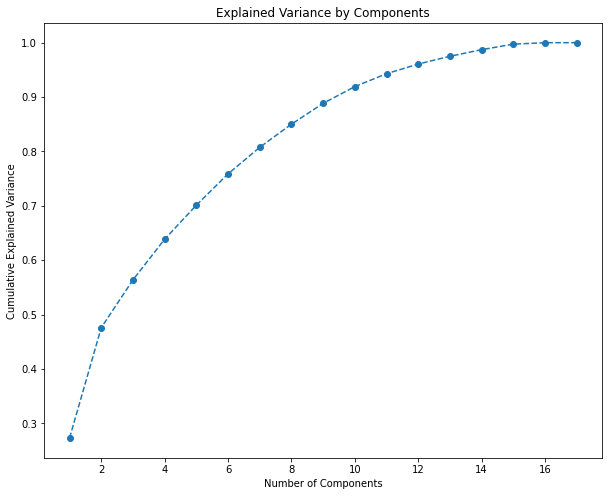

In [26]:
plt.figure(figsize=(10,8))
plt.plot(range(1,18),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [27]:
pca =PCA(n_components=7)

In [28]:
pca.fit(scaled_df )

PCA(n_components=7)

In [29]:
pca.transform(scaled_df)

array([[-1.68222026, -1.07645061,  0.48850652, ...,  0.01822453,
         0.05062893,  0.82914441],
       [-1.1382949 ,  2.50647666,  0.60121233, ...,  0.60580288,
        -1.13684066, -0.37450703],
       [ 0.96968401, -0.3835203 ,  0.10237138, ..., -2.17258431,
        -0.21722246, -1.57325769],
       ...,
       [-0.92620364, -1.8107856 , -0.47472306, ...,  0.38655287,
         2.97694806, -1.36982289],
       [-2.33655167, -0.65796601,  0.97472512, ...,  0.06977883,
         3.17438039, -0.9305112 ],
       [-0.55642216, -0.40046712,  1.01519557, ..., -1.24300026,
         3.75329147, -1.4140955 ]])

In [32]:
scores_pca = pca.transform(scaled_df)

In [36]:
wcss=[]
for i in range(1,21):
    kmeans_pca=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)


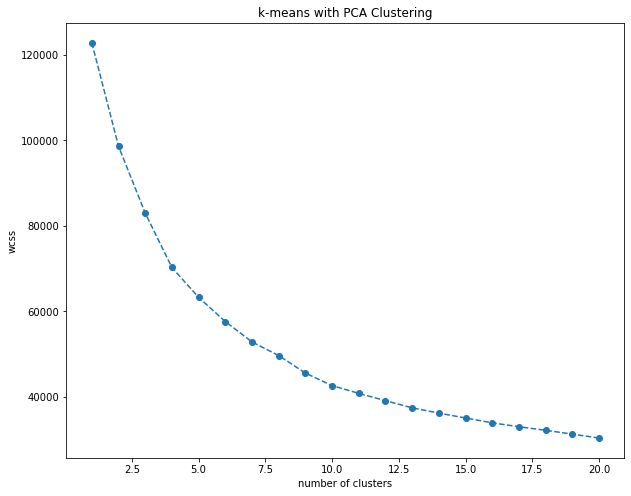

In [37]:
plt.figure(figsize=(10,8))
plt.plot(range(1,21),wcss,marker='o',linestyle='--')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.title('k-means with PCA Clustering')
plt.show()

In [ ]:
kmeans_model =KMeans(n_clusters=4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans=pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

In [38]:
kmeans_pca =KMeans(n_clusters=5,init='k-means++',random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=42)

In [47]:
df_pca_kmeans=pd.concat([df.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_pca_kmeans.columns.values[-7:]=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7']
df_pca_kmeans['Cluster']=kmeans_pca.labels_
                                  

In [48]:
df_pca_kmeans.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,12,-1.682220,-1.076451,0.488507,0.665552,0.018225,0.050629,0.829144,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.222222,12,-1.138295,2.506477,0.601212,-0.120437,0.605803,-1.136841,-0.374507,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,12,0.969684,-0.383520,0.102371,1.209266,-2.172584,-0.217222,-1.573258,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,12,-0.873628,0.043166,1.460167,1.151980,0.295632,-0.123689,-0.280759,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,12,-1.599434,-0.688581,0.365094,0.990232,-0.487039,0.075060,0.707923,4


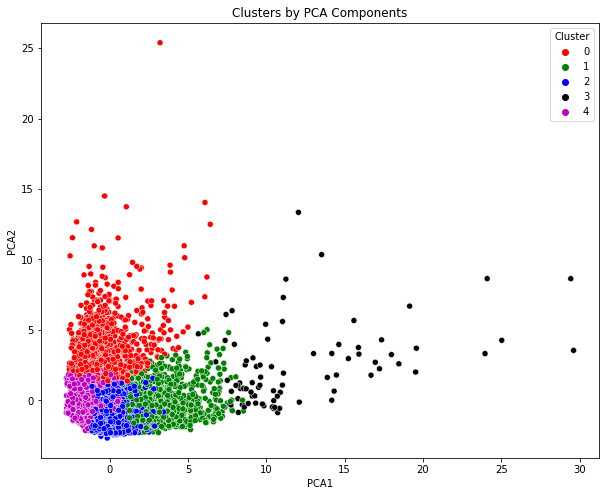

In [50]:
x_axis =df_pca_kmeans['PCA1']
y_axis =df_pca_kmeans['PCA2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_pca_kmeans['Cluster'],palette=['red','green','blue','black','m'])
plt.title('Clusters by PCA Components')
plt.show()

In [51]:
cluster_1_df =df_pca_kmeans[df_pca_kmeans['Cluster']==0]
cluster_1_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,Cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.222222,12,-1.138295,2.506477,0.601212,-0.120437,0.605803,-1.136841,-0.374507,0
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,...,0.000000,12,0.790382,1.846939,-1.210226,1.097620,1.101770,-0.186514,-0.362791,0
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,...,0.000000,12,2.802347,3.700248,0.136905,-1.353868,1.152656,-0.743162,0.529306,0
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,...,0.000000,12,-0.013248,4.129387,-1.628497,-0.234831,-0.527834,-0.521082,-0.703933,0
30,12136.219960,1.000000,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,0.500000,...,0.000000,12,3.755402,4.297932,-2.471543,0.795806,1.274387,-0.098987,-1.113669,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8835,1868.576501,1.000000,1337.34,1294.84,42.50,3132.667468,0.833333,0.833333,0.166667,1.000000,...,0.000000,6,0.220123,2.910079,-0.123311,-3.318465,-2.256413,3.533045,-1.108914,0
8840,2588.410789,0.888889,787.40,0.00,787.40,3762.650329,0.777778,0.000000,0.666667,0.555556,...,0.000000,9,-0.245413,1.894394,-1.476030,-1.935606,0.532425,1.614629,0.033583,0
8857,2330.222764,1.000000,1320.00,0.00,1320.00,14926.790590,0.428571,0.000000,0.285714,0.571429,...,0.200000,7,0.133198,5.425915,0.143383,-4.115252,1.394669,0.760881,-1.289693,0
8858,812.934042,1.000000,50.00,50.00,0.00,2185.500596,0.142857,0.142857,0.000000,1.000000,...,0.000000,7,-2.259977,3.021809,-0.193671,-2.966295,-1.215905,2.738247,-0.003074,0


In [52]:
cluster_2_df =df_pca_kmeans[df_pca_kmeans['Cluster']==1]
cluster_2_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,Cluster
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,12,0.969684,-0.383520,0.102371,1.209266,-2.172584,-0.217222,-1.573258,1
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,12,6.352920,-0.692540,2.081614,-0.817645,-1.096332,-1.014283,-1.404888,1
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,...,0.000000,12,5.525256,1.743816,0.023172,0.949761,-1.723858,0.893984,-0.671889,1
37,4047.480828,1.000000,2380.55,1642.17,738.38,1697.660901,0.750000,0.500000,0.750000,0.333333,...,0.000000,12,1.843840,1.254865,-1.034361,0.140552,-0.693248,0.326237,0.199289,1
44,5315.945594,1.000000,1525.44,469.80,1055.64,0.000000,1.000000,0.333333,1.000000,0.000000,...,0.000000,12,1.890438,-0.083296,-1.658788,1.048698,0.185783,-0.239552,-0.957319,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8689,368.318662,0.909091,8053.95,8053.95,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,...,0.777778,12,4.675246,-0.610123,3.931255,-0.312646,-1.650861,0.447586,0.740939,1
8707,78.448912,1.000000,1875.18,977.85,897.33,0.000000,1.000000,0.833333,0.916667,0.000000,...,1.000000,12,3.116548,-2.299026,-0.607003,-1.498874,-0.917577,-0.696759,-0.325983,1
8737,2533.618119,0.909091,5633.83,2985.92,2647.91,2451.807788,0.916667,0.500000,0.750000,0.333333,...,0.000000,12,4.859783,2.364069,0.100541,-1.016767,0.329436,0.140494,1.469533,1
8856,227.220411,1.000000,1387.60,288.54,1099.06,107.660394,1.000000,0.875000,0.875000,0.125000,...,0.142857,8,2.117145,-1.417794,-1.081164,-1.779228,-1.276019,2.523811,-0.650803,1


In [53]:
cluster_3_df =df_pca_kmeans[df_pca_kmeans['Cluster']==2]
cluster_3_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,Cluster
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.000000,0.583333,0.0,...,0.000000,12,0.251294,-0.780067,-1.132486,0.837267,0.818369,0.378712,0.795117,2
7,1823.652743,1.000000,436.20,0.00,436.20,0.0,1.000000,0.000000,1.000000,0.0,...,0.000000,12,0.277103,-1.290727,-1.828848,0.210648,0.170171,-0.076156,0.419176,2
10,1293.124939,1.000000,920.12,0.00,920.12,0.0,1.000000,0.000000,1.000000,0.0,...,0.000000,12,0.540493,-1.312971,-1.936598,0.347719,0.666481,0.269101,0.720938,2
12,1516.928620,1.000000,3217.99,2500.23,717.76,0.0,1.000000,0.250000,0.916667,0.0,...,0.250000,12,1.980269,-1.322180,-0.637807,0.037633,-0.300972,0.170962,0.432033,2
13,921.693369,1.000000,2137.93,419.96,1717.97,0.0,0.750000,0.166667,0.750000,0.0,...,0.083333,12,1.560547,-0.879472,-0.760415,0.304312,0.432837,-0.304588,0.252133,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,130.838554,1.000000,591.24,0.00,591.24,0.0,1.000000,0.000000,0.833333,0.0,...,1.000000,6,0.055462,-2.305755,-0.779283,-3.450614,0.644259,2.112542,-1.923403,2
8942,40.829749,1.000000,113.28,0.00,113.28,0.0,1.000000,0.000000,0.833333,0.0,...,0.250000,6,-0.592743,-1.868973,-1.128302,-2.340547,0.070745,2.963515,-1.354925,2
8945,28.493517,1.000000,291.12,0.00,291.12,0.0,1.000000,0.000000,0.833333,0.0,...,0.500000,6,-0.359629,-2.016145,-0.995355,-2.727433,0.268860,2.673305,-1.523465,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.0,1.000000,0.000000,0.833333,0.0,...,0.000000,6,-0.564369,-1.639123,-1.290238,-1.860551,0.187104,3.384215,-1.083192,2


In [54]:
cluster_4_df =df_pca_kmeans[df_pca_kmeans['Cluster']==3]
cluster_4_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,Cluster
125,2392.917738,1.000000,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.000000,0.000000,...,0.000000,12,9.504117,0.917662,4.480461,1.473033,-2.287062,2.997153,2.618383,3
138,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,...,0.000000,12,19.141602,6.683618,0.701637,5.440200,8.397924,4.820895,1.977139,3
153,13673.079610,1.000000,9792.23,3959.81,5832.42,2444.445738,1.000000,0.750000,1.000000,0.750000,...,0.000000,12,11.079655,7.299609,-1.542643,0.420274,2.186052,1.204387,0.483242,3
171,975.942008,1.000000,10221.35,7141.38,3079.97,1620.685551,1.000000,1.000000,0.833333,0.583333,...,0.750000,12,8.649422,2.511855,1.874663,-2.492456,-0.706139,0.159743,1.680187,3
204,4559.779234,1.000000,10848.50,8208.00,2640.50,0.000000,1.000000,0.666667,1.000000,0.000000,...,0.000000,12,8.522070,0.869713,1.549756,1.271473,0.302671,1.898013,1.618180,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6390,946.059539,1.000000,10915.37,9323.71,1591.66,0.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,12,8.589945,-0.484000,3.364472,-1.183275,-0.723056,0.314342,1.162250,3
6640,348.342172,0.909091,11878.25,7958.96,3919.29,0.000000,1.000000,1.000000,0.416667,0.000000,...,0.600000,12,8.840676,-0.227019,3.538975,-0.563492,0.004976,0.956862,2.056100,3
7046,2980.054695,0.818182,26784.62,26514.32,270.30,0.000000,0.583333,0.500000,0.083333,0.000000,...,0.750000,12,15.588819,5.662357,12.287102,3.424010,2.129863,2.012141,-0.058628,3
7277,561.003319,1.000000,11577.00,10975.00,602.00,875.583070,1.000000,1.000000,0.500000,0.250000,...,0.666667,12,8.062011,1.055843,4.153297,-1.038892,-1.893276,0.887609,1.651135,3


In [55]:
cluster_5_df =df_pca_kmeans[df_pca_kmeans['Cluster']==4]
cluster_5_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.00,12,-1.682220,-1.076451,0.488507,0.665552,0.018225,0.050629,0.829144,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.00,12,-0.873628,0.043166,1.460167,1.151980,0.295632,-0.123689,-0.280759,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.00,12,-1.599434,-0.688581,0.365094,0.990232,-0.487039,0.075060,0.707923,4
8,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,...,0.00,12,-0.441744,-0.461846,0.191147,1.016863,-0.270218,-0.306133,-0.084593,4
9,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,...,0.00,12,-0.562509,-0.366354,1.954087,0.972353,0.360360,-0.655959,-0.770644,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,728.352548,1.000000,734.40,734.40,0.0,239.891038,0.333333,0.333333,0.000000,0.166667,...,0.00,6,-1.377779,-0.321947,0.598346,-1.373327,-1.071534,3.612982,-1.097334,4
8943,5.871712,0.500000,20.90,20.90,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,...,0.00,6,-2.207388,-1.262065,1.500539,-1.454776,0.430657,3.399338,-1.215383,4
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,...,0.00,6,-1.097961,-0.792168,1.166891,-0.946647,-0.443565,3.438401,-1.756274,4
8948,13.457564,0.833333,0.00,0.00,0.0,36.558778,0.000000,0.000000,0.000000,0.166667,...,0.25,6,-2.336552,-0.657966,0.974725,-1.861279,0.069779,3.174380,-0.930511,4


<AxesSubplot:xlabel='Cluster', ylabel='count'>

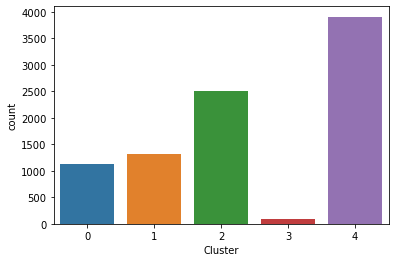

In [56]:
# visulization
sns.countplot(x='Cluster',data=df_pca_kmeans)

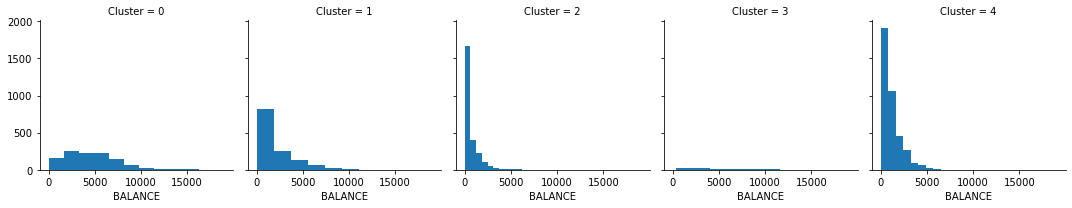

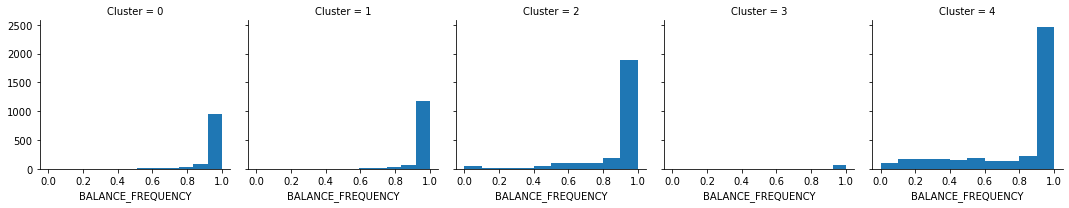

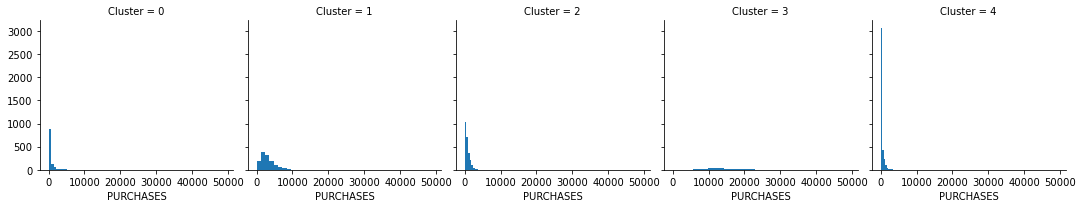

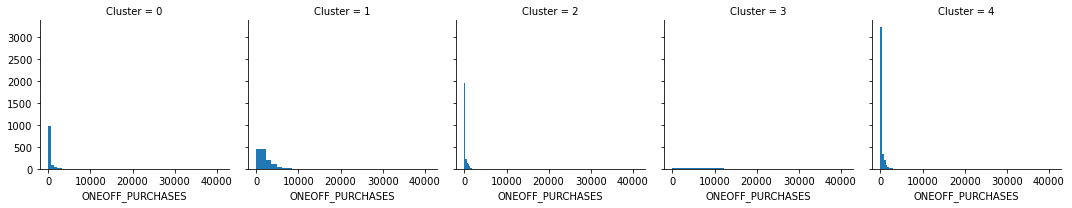

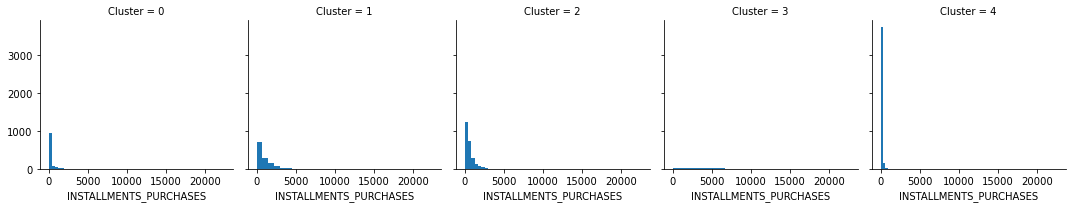

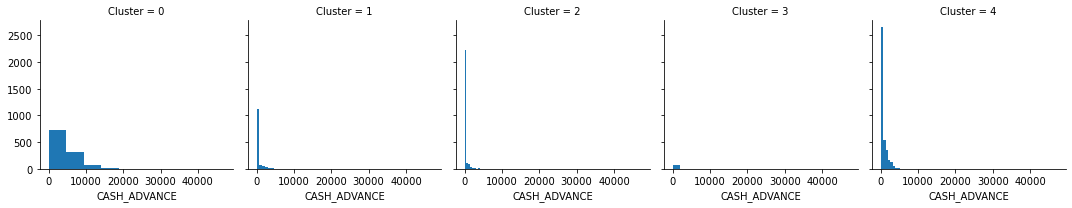

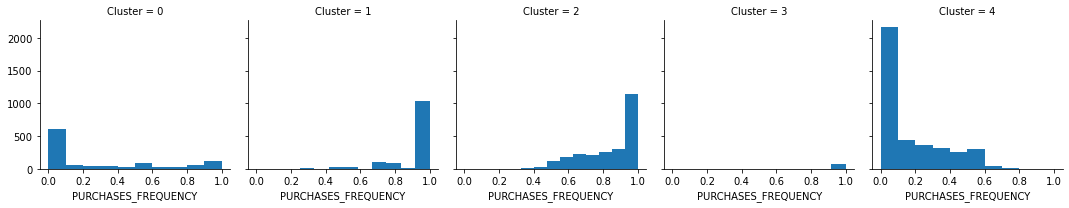

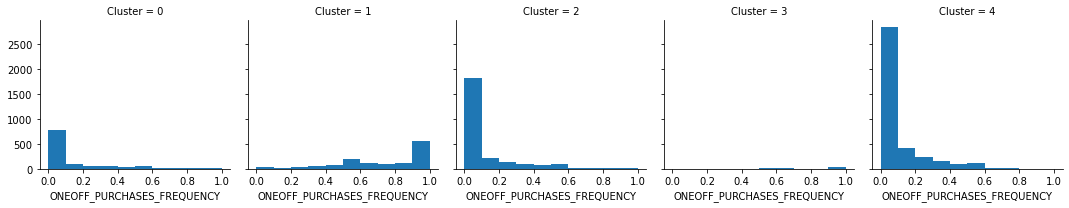

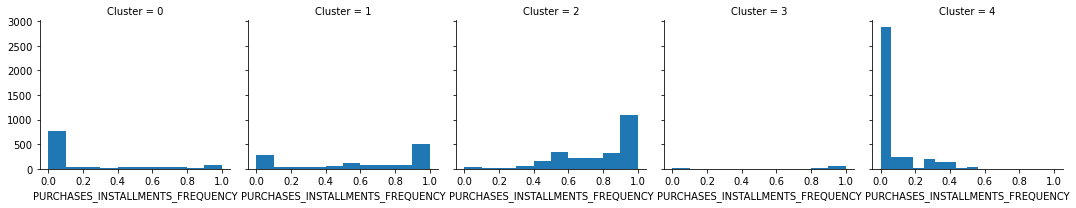

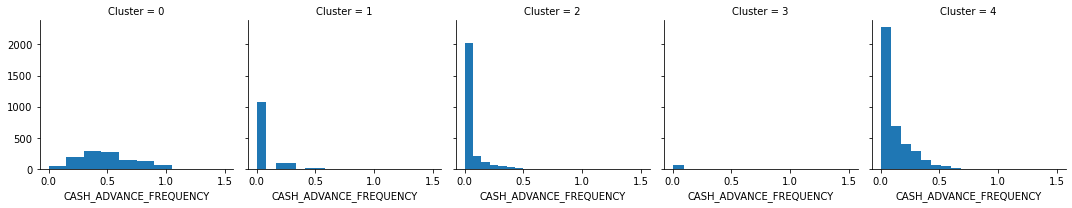

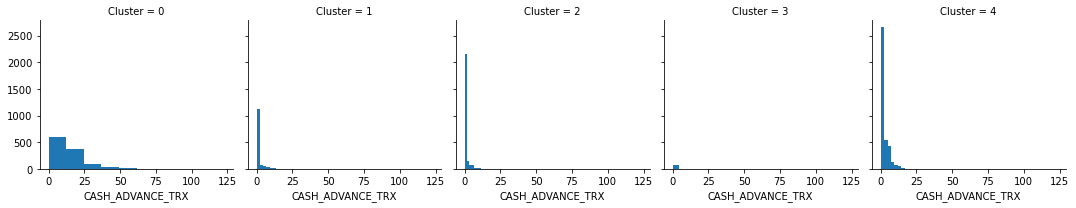

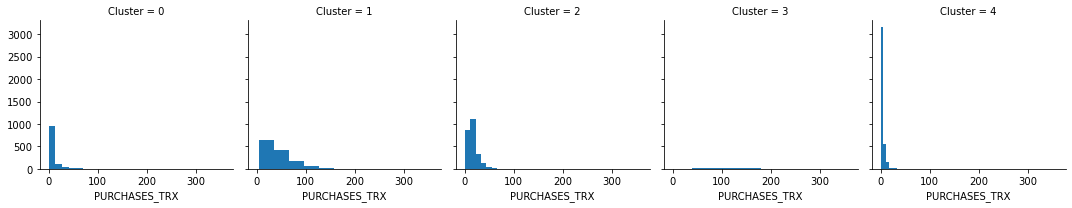

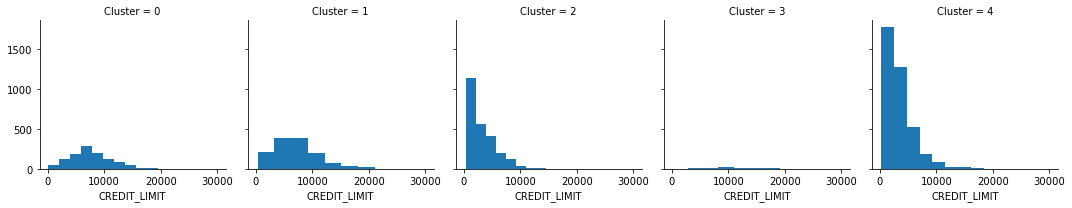

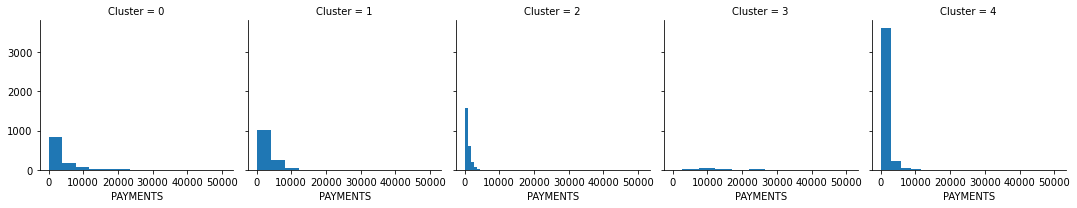

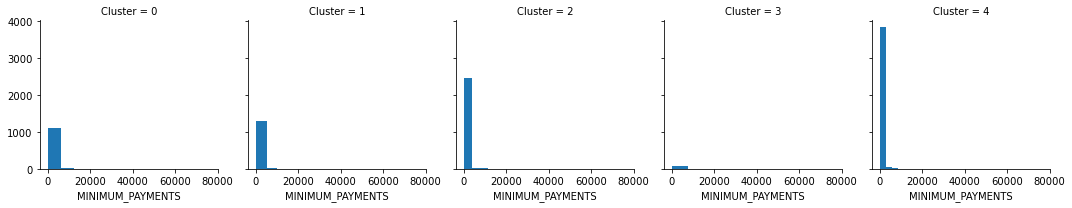

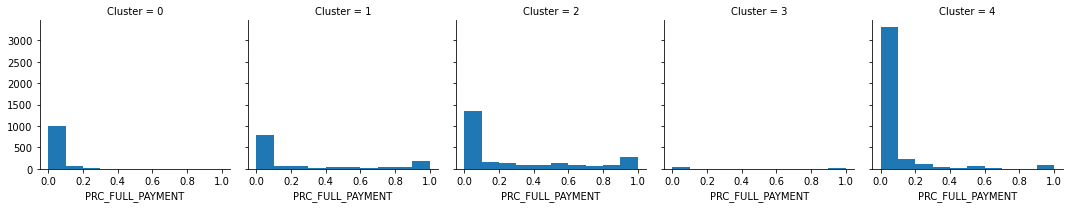

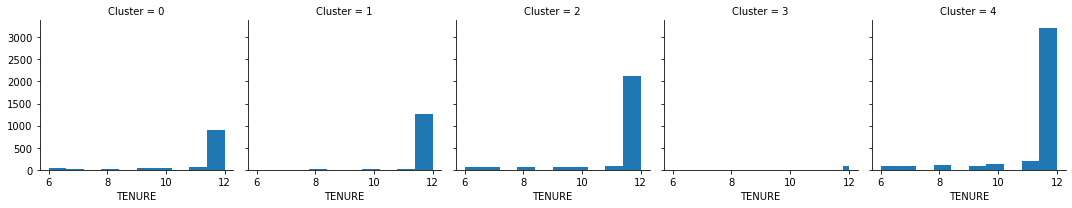

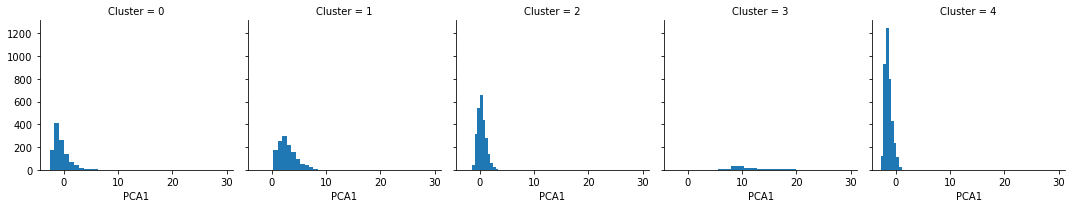

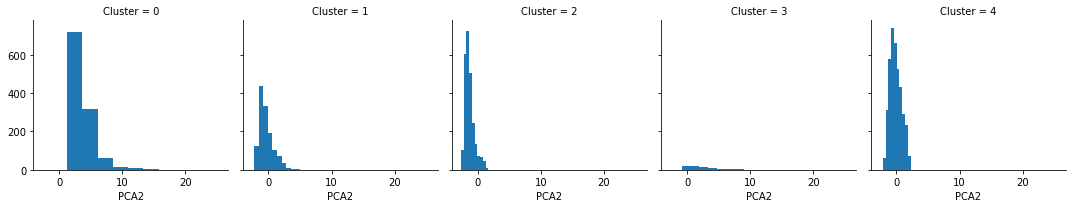

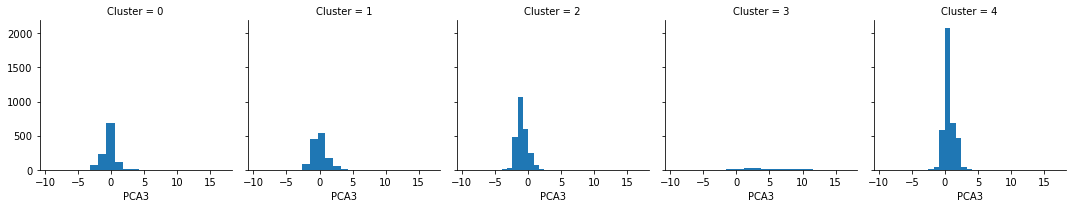

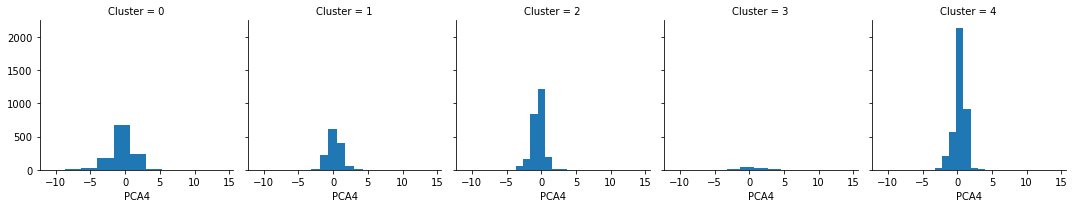

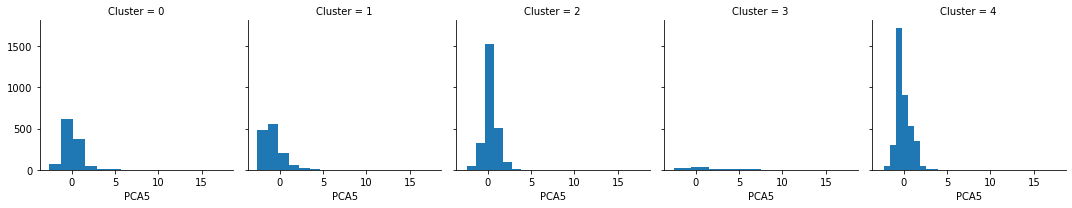

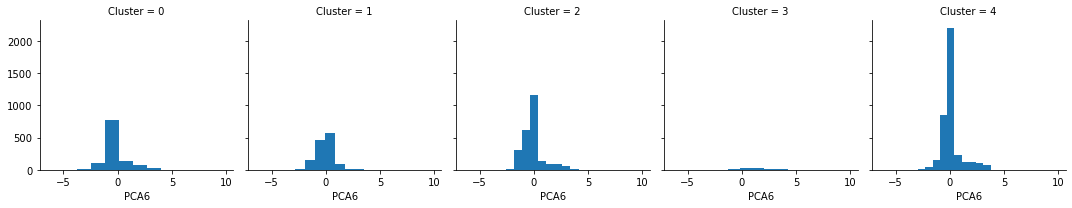

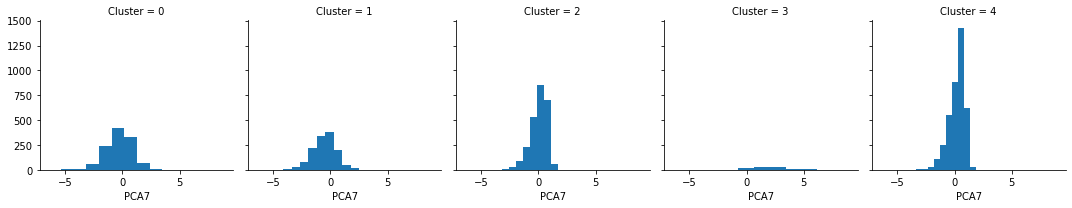

In [57]:
for c in df_pca_kmeans.drop(['Cluster'],axis=1):
    grid =sns.FacetGrid(df_pca_kmeans,col='Cluster')
    grid =grid.map(plt.hist,c)
plt.show()    

# Training and Testing the model accuracy using decision tree

In [58]:
X =df_pca_kmeans.drop(['Cluster'],axis=1)
y = df_pca_kmeans[['Cluster']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [59]:
X_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
7379,384.803407,1.000000,549.00,291.00,258.00,0.000000,0.500000,0.083333,0.416667,0.000000,...,610.732047,0.000000,12,-0.628915,-1.145357,-0.464742,0.572308,-0.272527,0.169134,0.809128
677,983.339069,1.000000,5601.54,3073.82,2527.72,36.336457,1.000000,0.750000,1.000000,0.083333,...,207.134142,0.166667,12,6.769285,-0.632099,-0.332794,-0.273452,-0.440676,0.761854,1.206681
1654,96.109401,1.000000,938.20,938.20,0.00,148.986635,1.000000,1.000000,0.000000,0.083333,...,182.443604,0.416667,12,1.364451,-0.560230,0.811216,-0.069047,-1.973093,-0.964411,-1.461323
8330,777.210275,1.000000,622.51,0.00,622.51,1387.449608,1.000000,0.000000,0.857143,0.428571,...,521.876562,0.000000,7,-0.121110,0.114669,-1.733575,-2.585891,-0.014076,2.896312,-0.149680
5367,4375.764064,1.000000,1016.41,0.00,1016.41,252.583938,0.916667,0.000000,0.833333,0.083333,...,1165.418430,0.000000,12,1.006086,0.204468,-1.619483,0.846907,0.657565,-0.522781,-0.782422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5258,15.577506,1.000000,143.76,0.00,143.76,0.000000,1.000000,0.000000,0.916667,0.000000,...,146.043815,0.300000,12,-0.034666,-1.960954,-1.514206,-0.506449,-0.024819,-0.422272,0.417111
8438,5484.339435,1.000000,0.00,0.00,0.00,5990.590134,0.000000,0.000000,0.000000,0.250000,...,2453.164396,0.000000,12,-1.434757,3.441872,-0.427052,0.462573,0.276054,-0.483150,-0.211800
3958,117.018324,0.909091,625.94,625.94,0.00,0.000000,0.545455,0.545455,0.000000,0.000000,...,206.754529,0.142857,11,0.038923,-0.545110,0.907939,0.516006,-1.018793,-0.300750,-1.699296
7107,7.388588,0.545455,84.05,0.00,84.05,0.000000,0.416667,0.000000,0.416667,0.000000,...,99.694319,0.200000,12,-1.089565,-1.442855,0.504674,0.001431,0.804731,-0.559606,-0.007486


In [60]:
X_test

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
6260,475.826042,1.000000,950.00,950.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,290.333335,0.000000,12,-1.099484,-0.531662,0.758172,1.154223,-0.531434,-0.011793,0.365029
6494,2732.813233,1.000000,245.01,245.01,0.00,2721.303612,0.166667,0.166667,0.000000,0.250000,...,782.936511,0.000000,12,-1.121543,1.289812,0.140379,0.635820,-0.493824,-0.272264,0.006998
5712,1219.143484,0.666667,0.00,0.00,0.00,1893.219765,0.000000,0.000000,0.000000,0.500000,...,274.065414,0.000000,6,-2.544745,0.947665,0.883649,-2.067119,0.247931,3.336303,-0.917449
615,8900.194109,1.000000,0.00,0.00,0.00,4849.693752,0.000000,0.000000,0.000000,0.916667,...,2452.882838,0.000000,12,-1.364528,8.149656,-1.401249,-1.465019,-0.390995,-1.022073,0.096936
8062,617.496041,1.000000,521.64,0.00,521.64,0.000000,1.000000,0.000000,1.000000,0.000000,...,234.724653,0.000000,12,0.174946,-1.635096,-1.769072,-0.021005,0.079344,-0.031618,0.723059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4551,19.991586,0.875000,144.00,0.00,144.00,0.000000,0.750000,0.000000,0.625000,0.000000,...,96.495473,0.800000,8,-0.577832,-2.052684,-0.264322,-2.324032,0.516967,1.165731,-1.356001
757,5499.895765,1.000000,0.00,0.00,0.00,485.269985,0.000000,0.000000,0.000000,0.333333,...,2703.217084,0.000000,12,-1.326474,2.017596,-0.269617,1.440937,0.117918,0.017820,-0.259683
1200,3322.314890,1.000000,676.00,601.00,75.00,0.000000,0.500000,0.250000,0.333333,0.000000,...,753.395870,0.000000,12,0.196421,0.097239,-0.152720,1.398548,-0.412580,-0.510820,-1.112360
7751,3332.460521,1.000000,1061.66,120.00,941.66,3820.451636,1.000000,0.125000,0.875000,0.500000,...,857.134571,0.000000,8,0.440129,1.592198,-1.895871,-2.164811,0.123597,2.006695,-0.721095


In [61]:
#Decision_Tree
model =DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)
y_pred =model.predict(X_test)

In [62]:
#Confusion_matrix
print(metrics.confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 330    6    0    2    5]
 [   5  342   21    2    5]
 [   0   22  726    0   25]
 [   2    4    0   22    0]
 [   6    2   18    0 1140]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       343
           1       0.91      0.91      0.91       375
           2       0.95      0.94      0.94       773
           3       0.85      0.79      0.81        28
           4       0.97      0.98      0.97      1166

    accuracy                           0.95      2685
   macro avg       0.93      0.92      0.92      2685
weighted avg       0.95      0.95      0.95      2685



In [63]:
model.score(X_test,y_test)

0.9534450651769087